In [2]:
# setting up
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sn
import tensorflow as tf

img_height, img_width = (224, 224)
batch_size = 16

trainvalid_data_dir = '/mnt/Project-2/Leather image datasets/V2/trainvalidation'
test_data_dir  = '/mnt/Project-2/Leather image datasets/V2/test'
datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                  shear_range = 0,
                                  zoom_range = 0,
                                  horizontal_flip = False,
                                  validation_split = 0.2)

train_generator = datagen.flow_from_directory(
    trainvalid_data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

valid_generator = datagen.flow_from_directory(
    trainvalid_data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation')

test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_height, img_width),
    batch_size = 1,
    class_mode = 'categorical')

x, y = test_generator.next()
x.shape

Found 4864 images belonging to 4 classes.
Found 1216 images belonging to 4 classes.
Found 1520 images belonging to 4 classes.


(1, 224, 224, 3)

In [3]:
# configuring model
base_model = InceptionV3(include_top = False, 
                      weights = None) 

x = base_model.output 
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation = 'relu')(x) 

x = Dense(512, activation = 'relu')(x)
predictions = Dense(train_generator.num_classes, activation = 'softmax')(x) 

model = Model(inputs = base_model.input, outputs = predictions) 

for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# earlystopper = EarlyStopping(monitor="loss", patience=10, verbose=1)

# history = model.fit(train_generator, epochs = 100, validation_data=valid_generator, callbacks=[earlystopper])

history = model.fit(train_generator, epochs = 100, validation_data=valid_generator)
model.save('inceptionNetV3_100eVAL_16b_v2_model.h5')

Epoch 1/100
304/304 [==============================] - 56s 164ms/step - loss: 1.4774 - accuracy: 0.3803 - val_loss: 1.5011 - val_accuracy: 0.2311
Epoch 2/100
304/304 [==============================] - 49s 162ms/step - loss: 1.1190 - accuracy: 0.4890 - val_loss: 1.3267 - val_accuracy: 0.4498
Epoch 3/100
304/304 [==============================] - 49s 161ms/step - loss: 0.9519 - accuracy: 0.5700 - val_loss: 2.6337 - val_accuracy: 0.5115
Epoch 4/100
304/304 [==============================] - 49s 160ms/step - loss: 0.7254 - accuracy: 0.6642 - val_loss: 0.7144 - val_accuracy: 0.7319
Epoch 5/100
304/304 [==============================] - 49s 160ms/step - loss: 0.6567 - accuracy: 0.7108 - val_loss: 0.7132 - val_accuracy: 0.6990
Epoch 6/100
304/304 [==============================] - 49s 160ms/step - loss: 0.5668 - accuracy: 0.7769 - val_loss: 0.9286 - val_accuracy: 0.6941
Epoch 7/100
304/304 [==============================] - 49s 161ms/step - loss: 0.4713 - accuracy: 0.8216 - val_loss: 0.4810 -

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

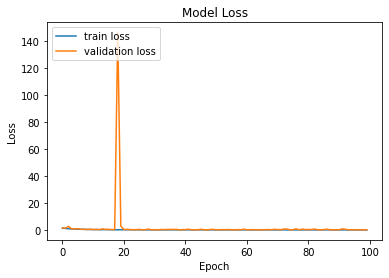

In [5]:
# plot the model accuracy and validation accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train loss','validation loss'], loc='upper left')
plt.show()